In [4]:
import numpy as np
import os
import glob
import json
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = 'pascal_5000'
root_dir = '/home/kshitid20/Documents/Gemma Roig lab Dropbox/Kshitij/Multitask/CVPR_transferlearning/CVPR2020_results/'
plt.rcParams.update({'font.size': 14})
feat_ablation_type = ['None','centering','znorm']
operation_type = ['default','debiased_centered']
methods = ['lap_cka','lap_rsa','rbf_cka','rbf_rsa','linear_cka','linear_rsa',\
           'pearson_cka','pearson_rsa','cosine_cka','cosine_rsa','euclidean_cka',\
           'euclidean_rsa']
for operation in operation_type:
    for ablation in feat_ablation_type:
        
        data_path = os.path.join(root_dir,dataset,operation,ablation,'small_timing_boxplot_data.pkl')
        with open(data_path, 'rb') as f:
            data = pickle.load(f)
        df = pd.DataFrame (data, columns = ['correlation', 'distances'])
        #print(df)
        print(operation + "__" + ablation)
        print("------------------------------------------------------------------")
        for method in methods:
            print(method,\
          round(df['correlation'][df['distances']==method].mean(),3),\
          round(np.std(df['correlation'][df['distances']==method]),3))
        print("------------------------------------------------------------------")
        #plt.figure()
        #ax = sns.violinplot( x=df["distances"], y=df["correlation"])
        #plt.ylim([-0.6,1.0])
        #plt.xticks(rotation=90)
        #plt.title(operation + "__" + ablation)

default__None
------------------------------------------------------------------
lap_cka 0.214 0.0
lap_rsa -0.342 0.0
rbf_cka 0.039 0.0
rbf_rsa -0.44 0.0
linear_cka 0.114 0.0
linear_rsa -0.232 0.0
pearson_cka 0.49 0.0
pearson_rsa 0.125 0.0
cosine_cka 0.624 0.0
cosine_rsa 0.325 0.0
euclidean_cka 0.191 0.0
euclidean_rsa -0.441 0.0
------------------------------------------------------------------
default__centering
------------------------------------------------------------------
lap_cka 0.214 0.0
lap_rsa -0.342 0.0
rbf_cka 0.039 0.0
rbf_rsa -0.44 0.0
linear_cka 0.209 0.0
linear_rsa 0.444 0.0
pearson_cka 0.394 0.0
pearson_rsa 0.532 0.0
cosine_cka 0.384 0.0
cosine_rsa 0.521 0.0
euclidean_cka 0.191 0.0
euclidean_rsa -0.441 0.0
------------------------------------------------------------------
default__znorm
------------------------------------------------------------------
lap_cka 0.103 0.0
lap_rsa -0.411 0.0
rbf_cka 0.138 0.0
rbf_rsa -0.412 0.0
linear_cka 0.32 0.0
linear_rsa 0.746 0.0
pe

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

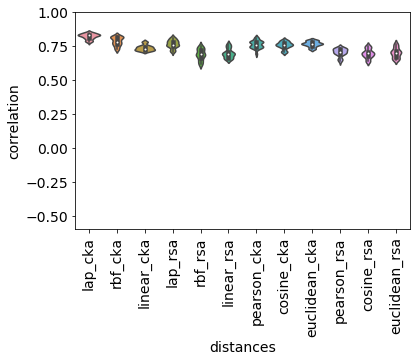

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 14})

df = pd.DataFrame (data, columns = ['correlation', 'distances'])
#print(df)
ax = sns.violinplot( x=df["distances"], y=df["correlation"])
plt.ylim([-0.6,1.0])
plt.xticks(rotation=90)

In [29]:
dist_type = ['pearson', 'euclidean', 'cosine','lap','rbf','linear']
similarity_type = ['spearman','cka', 'pearson']
ablation_type = ['default','centered','debiased_centered']
measures = []
for dist in dist_type:
    for similarity in similarity_type:
        for ablation in (ablation_type):
            if ablation=='default':
                debiased = False
                centered = False
            elif ablation=='centered':
                debiased = False
                centered = True
            elif ablation=='debiased_centered':
                debiased = True
                centered = True
            method_name = dist+"_"+similarity + "_" +ablation
            measures.append(method_name)
for measure in measures:
    print(measure,\
          round(df['correlation'][df['distances']==measure].mean(),3),\
          round(np.std(df['correlation'][df['distances']==measure]),3))

pearson_spearman_default 0.842 0.019
pearson_spearman_centered 0.828 0.023
pearson_spearman_debiased_centered 0.828 0.023
pearson_cka_default 0.497 0.002
pearson_cka_centered 0.835 0.013
pearson_cka_debiased_centered 0.851 0.019
pearson_pearson_default nan nan
pearson_pearson_centered nan nan
pearson_pearson_debiased_centered nan nan
euclidean_spearman_default 0.487 0.241
euclidean_spearman_centered 0.83 0.023
euclidean_spearman_debiased_centered 0.83 0.024
euclidean_cka_default 0.567 0.041
euclidean_cka_centered 0.696 0.038
euclidean_cka_debiased_centered 0.822 0.03
euclidean_pearson_default nan nan
euclidean_pearson_centered nan nan
euclidean_pearson_debiased_centered nan nan
cosine_spearman_default 0.845 0.019
cosine_spearman_centered 0.831 0.023
cosine_spearman_debiased_centered 0.831 0.023
cosine_cka_default 0.497 0.002
cosine_cka_centered 0.848 0.014
cosine_cka_debiased_centered 0.856 0.019
cosine_pearson_default nan nan
cosine_pearson_centered nan nan
cosine_pearson_debiased_cen